In [1]:
import pandas as pd
df = pd.read_csv('/Users/yuemun/Desktop/Python/P4-Movie-Ratings.csv') 
df

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [3]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
df.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRatings',
       'BudgetMillion', 'Year']

In [6]:
df.head()

,Film,Genre,CriticRating,AudienceRatings,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticRating     559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   BudgetMillion    559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
df.describe()
#doesn't make sense for Year. it should be categorical var instead of numerical

,CriticRating,AudienceRatings,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
#to change the type of var to category
df.Film = df.Film.astype('category')
df.Genre = df.Genre.astype('category')
df.Year = df.Year.astype('category')

In [12]:
df.info()
#we can see types have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRating     559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillion    559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [18]:
#to check the unique values for each category
df.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [19]:
df.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [20]:
#----------------Advanced visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

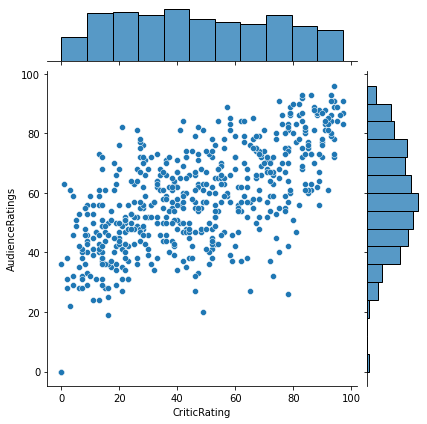

In [21]:
#Joint Plot
j = sns.jointplot(data = df, x='CriticRating', y='AudienceRatings')

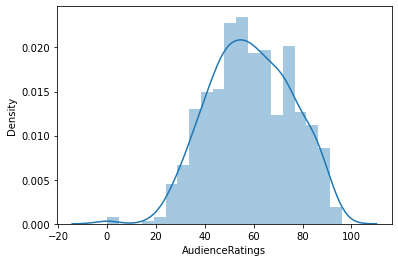

In [26]:
#histogram using sns
h1 = sns.distplot(df.AudienceRatings, bins=20)
#normally distributed

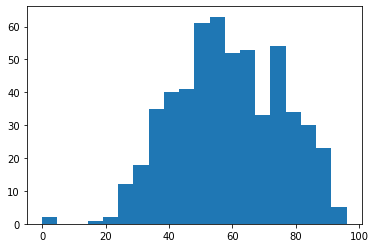

In [27]:
#histogram using pyplot
h2 = plt.hist(df.AudienceRatings, bins=20)

In [28]:
#-----------------

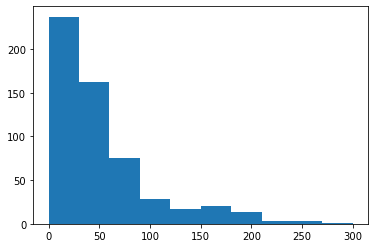

In [30]:
#Stacked histograms
#budget for all genres
plt.hist(df.BudgetMillion)
plt.show()

In [31]:
#to find the budget million for certain genre
#Step1
df[df.Genre == 'Drama']

,Film,Genre,CriticRating,AudienceRatings,BudgetMillion,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


In [32]:
#Step2: select only the budget million column
df[df.Genre == 'Drama'].BudgetMillion

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillion, Length: 101, dtype: int64

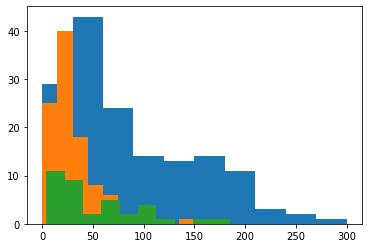

In [34]:
#Step3: sub into the histogram
plt.hist(df[df.Genre == 'Action'].BudgetMillion)
plt.hist(df[df.Genre == 'Drama'].BudgetMillion)
plt.hist(df[df.Genre == 'Thriller'].BudgetMillion)
plt.show()

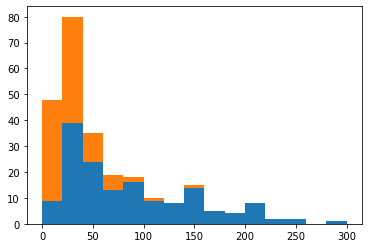

In [39]:
#Step4: stack them by make them a list
plt.hist([df[df.Genre == 'Action'].BudgetMillion,df[df.Genre == 'Drama'].BudgetMillion], bins=15, stacked=True)
plt.show()

In [41]:
#Use for loop
#create a list that can show all values for genre first
df.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

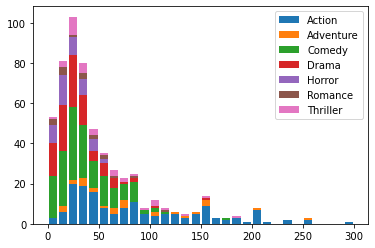

In [51]:
#for loop
list1=[] #create a list for genre for histogram
mylabels=[] #create a list for genre for label
for gen in df.Genre.cat.categories:
    list1.append(df[df.Genre == gen].BudgetMillion)
    mylabels.append(gen)
plt.hist(list1, bins=30, stacked=True, rwidth=0.8, label=mylabels) #rwidth-->gaps between bars; 0.8=80%space
                                                                #label-->to set#-- legend
plt.legend() #to show legend
plt.show()

In [52]:
#-------------------
#boxplot

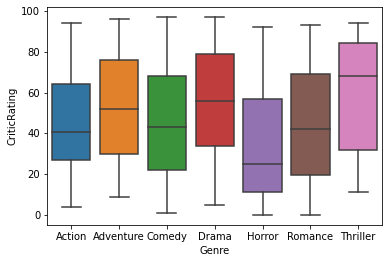

In [54]:
bp = sns.boxplot(data = df, x='Genre', y = 'CriticRating')

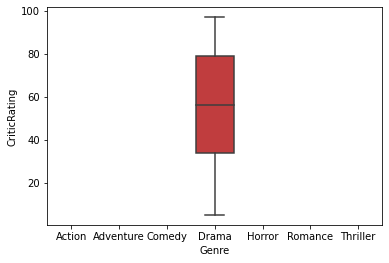

In [55]:
#boxplot for drama only
bp = sns.boxplot(data = df[df.Genre == 'Drama'], x='Genre', y = 'CriticRating')